You have to mount your drive. In the drive have the augumented zip folder cross check the file name. Then you should have the model you need to check the metrics for in drive.

In [36]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import zipfile
zip_file_path = '/content/drive/My Drive/augmented.zip'

# Path to extract the contents of the zip file
extract_path = '/content/dataset/'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the input size based on the model architecture (e.g., 227x227 for AlexNet)
input_size = (227, 227)

# Create data generator with augmentation and normalization
data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% for training, 20% for validation
)

# Create data generator for both training and validation
train_generator = data_generator.flow_from_directory(
    '/content/dataset/augmented',
    target_size=input_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'  # specify 'training' for the training set
)

val_generator = data_generator.flow_from_directory(
    '/content/dataset/augmented',
    target_size=input_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # specify 'validation' for the validation set
)


Found 1245 images belonging to 6 classes.
Found 309 images belonging to 6 classes.


In [40]:
#Loading saved model for drive
from tensorflow.keras.models import load_model

# Path to the saved model on Google Drive
model_path = '/content/drive/My Drive/resnet_model.h5' #change this to alexnet_model.h5, resnet_model.h5, etc

# Load the model
loaded_model = load_model(model_path)


In [41]:
n_classes=6

In [42]:
import numpy as np

# Make predictions on the validation set
y_score = loaded_model.predict(val_generator)

# Convert predictions to class labels
y_pred = np.argmax(y_score, axis=1)


10/10 [==============================] - 18s 2s/step


In [43]:
import numpy as np

# Initialize an empty list to store all true labels
all_true_labels = []

# Total number of samples in the dataset
total_samples = len(val_generator)

# Iterate over the validation generator to extract true labels batch by batch
for batch_data, batch_labels in val_generator:
    # Extract true labels from the current batch
    true_labels = np.argmax(batch_labels, axis=1)

    # Append the true labels to the list
    all_true_labels.extend(true_labels)

    # Break the loop if all data has been processed
    if len(all_true_labels) >= total_samples:
        break

# Convert the list of true labels to a numpy array
y_true = np.array(all_true_labels)
y_true

array([1, 1, 1, 3, 5, 5, 0, 2, 0, 2, 1, 2, 1, 5, 5, 0, 1, 1, 1, 0, 3, 2,
       2, 1, 2, 5, 2, 5, 4, 1, 0, 3])

In [44]:
import numpy as np

# Initialize an empty list to store all true labels
all_true_labels = []

# Iterate over the validation generator to extract true labels batch by batch
for batch_data, batch_labels in val_generator:
    # Extract true labels from the current batch
    true_labels = np.argmax(batch_labels, axis=1)

    # Append the true labels to the list
    all_true_labels.extend(true_labels)

    # Break the loop if all data has been processed
    if len(all_true_labels) >= len(val_generator):
        break

# Convert the list of true labels to a numpy array
y_true = np.array(all_true_labels)
y_true

array([3, 2, 1, 2, 4, 2, 5, 3, 5, 2, 1, 2, 4, 3, 5, 1, 0, 2, 3, 5, 4, 2,
       2, 0, 0, 0, 0, 2, 3, 5, 1, 1])

classification report

In [45]:
from sklearn.metrics import classification_report

# Initialize empty lists to store true labels (y_true) and predicted labels (y_pred)
y_true = []
y_pred = []

# Iterate over the validation generator to make predictions batch by batch
for batch_data, batch_labels in val_generator:
    # Predict labels for the current batch
    batch_pred = loaded_model.predict(batch_data)

    # Convert one-hot encoded labels to class labels for true labels
    true_labels = np.argmax(batch_labels, axis=1)

    # Convert predicted probabilities to class labels for predicted labels
    pred_labels = np.argmax(batch_pred, axis=1)

    # Append true labels and predicted labels for the current batch to the lists
    y_true.extend(true_labels)
    y_pred.extend(pred_labels)

    # Break the loop if all data has been processed
    if len(y_true) >= len(val_generator):
        break

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Now you can use y_true and y_pred to print the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))


1/1 [==============================] - 2s 2s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        10
           3       0.00      0.00      0.00         3
           4       0.17      1.00      0.29         3
           5       0.00      0.00      0.00        10

    accuracy                           0.53        32
   macro avg       0.36      0.50      0.38        32
weighted avg       0.45      0.53      0.46        32



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


confusion matrix

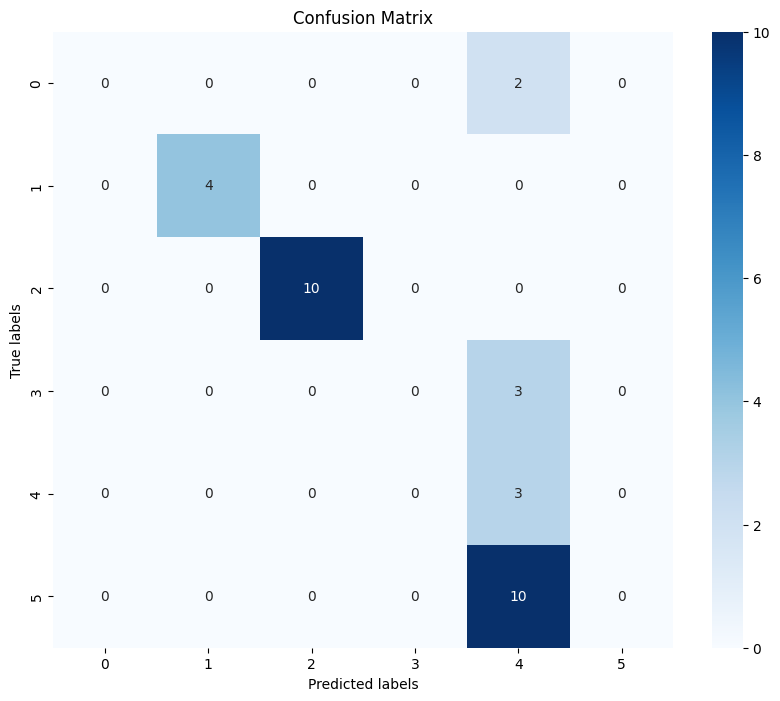

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


roc curve

class-wise precision and recall

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


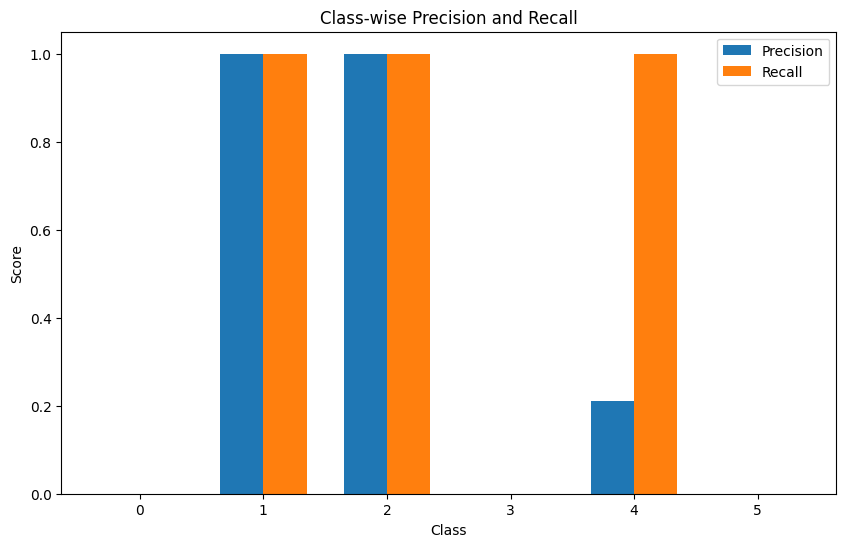

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall for each class
class_precision = dict()
class_recall = dict()
for i in range(n_classes):
    # Convert one-hot encoded labels to binary labels
    y_true_binary = (y_true == i)
    y_pred_binary = (y_pred == i)

    # Compute precision and recall for the current class
    class_precision[i] = precision_score(y_true_binary, y_pred_binary)
    class_recall[i] = recall_score(y_true_binary, y_pred_binary)

# Plot class-wise precision and recall
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(n_classes)
plt.bar(index, list(class_precision.values()), bar_width, label='Precision')
plt.bar(index + bar_width, list(class_recall.values()), bar_width, label='Recall')
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Class-wise Precision and Recall')
plt.xticks(index + bar_width / 2, range(n_classes))
plt.legend()
plt.show()


ROC curve

In [ ]:
y_true.shape

(32,)

In [ ]:
y_score.shape

(309, 6)

In [ ]:
y_pred.shape

(32,)

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize an empty figure and axes
plt.figure(figsize=(10, 6))

# Iterate over each class
for i in range(n_classes):
    # Compute ROC curve and ROC area for the current class
    fpr, tpr, _ = roc_curve(y_true == i, y_score[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current class
    plt.plot(fpr, tpr, lw=2, label='Class %d (AUC = %0.2f)' % (i, roc_auc))

# Plot a diagonal line representing random guessing
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add legend
plt.legend(loc="lower right")

# Show the plot
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [32, 309]

<Figure size 1000x600 with 0 Axes>

Saliency map

In [ ]:
def generate_saliency_map(model, image_array, class_index):
    # Convert image array to TensorFlow tensor with explicit shape
    image_tensor = tf.convert_to_tensor(image_array, dtype=tf.float32)



    # Compute gradient of predicted class score with respect to input image pixels
    with tf.GradientTape() as tape:
        tape.watch(image_tensor)
        preds = model(image_tensor)
        class_output = preds[:, class_index]

    grads = tape.gradient(class_output, image_tensor)

    # Compute the absolute gradients
    abs_grads = tf.abs(grads)

    # Compute the maximum absolute gradient across channels
    saliency_map = tf.reduce_max(abs_grads, axis=-1)

    return saliency_map
saliency_map.shape

NameError: name 'saliency_map' is not defined

In [ ]:
def plot_saliency_map(image_array, saliency_map):
    # Normalize saliency map
    saliency_map /= np.max(saliency_map)
    image_array=np.reshape(image_array, (227, 227,3))
    # Plot saliency map overlaid on original image
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(image_array)
    plt.axis('off')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(saliency_map, cmap='viridis')
    plt.axis('off')
    plt.title('Saliency Map')
    plt.show()

In [ ]:
# Example usage
class_index = 3  # Index of the class for which you want to generate the saliency map
batch_data, _ = val_generator.next()  # Get one batch of images from the validation generator
image_array = batch_data[0]  # Take the first image from the batch

In [ ]:
# Assuming 'tensor' is your TensorFlow tensor
numpy_array1 = saliency_map.numpy()
numpy_array1=np.reshape(numpy_array1, (227, 227))

numpy_array1.shape

(227, 227)

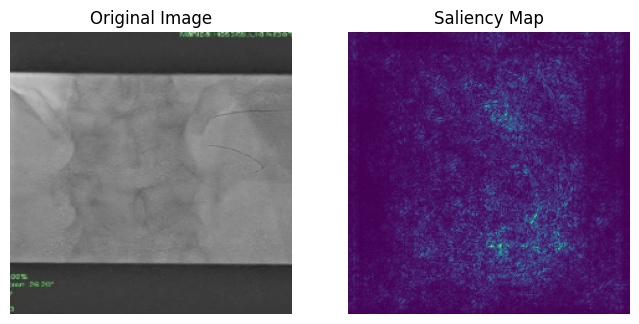

In [ ]:
# Plot saliency map overlaid on the original image
plot_saliency_map(image_array, numpy_array1)

precision-recall curve

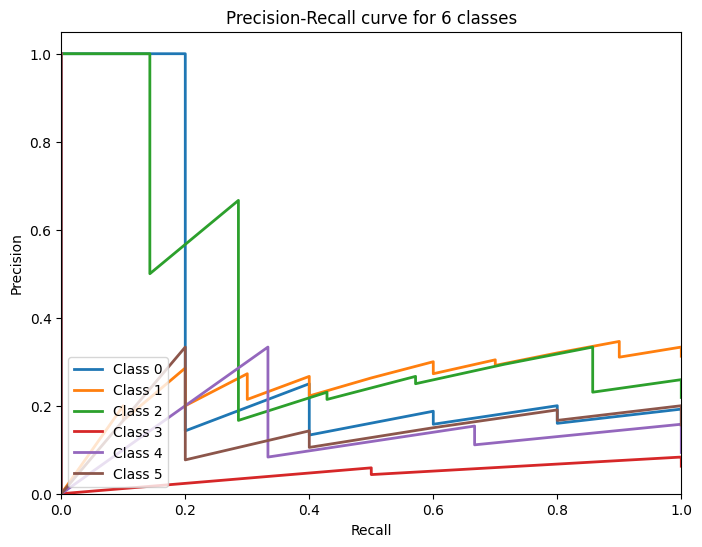

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming you have defined y_true, y_pred, and y_score somewhere above
# y_true: true labels (1D array)
# y_pred: predicted labels (1D array)
# y_score: predicted probabilities (2D array with shape (n_samples, n_classes))

n_classes = 6  # Number of classes

# Compute precision and recall for each class
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve((y_true == i).astype(int), y_score[:, i])

# Plot Precision-Recall curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label='Class {0}'.format(i))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for 6 classes')
plt.legend(loc="lower left")
plt.show()


Average precision-recall curve

Average Area Under the Precision-Recall Curve (AUPRC): 0.2634064262643591


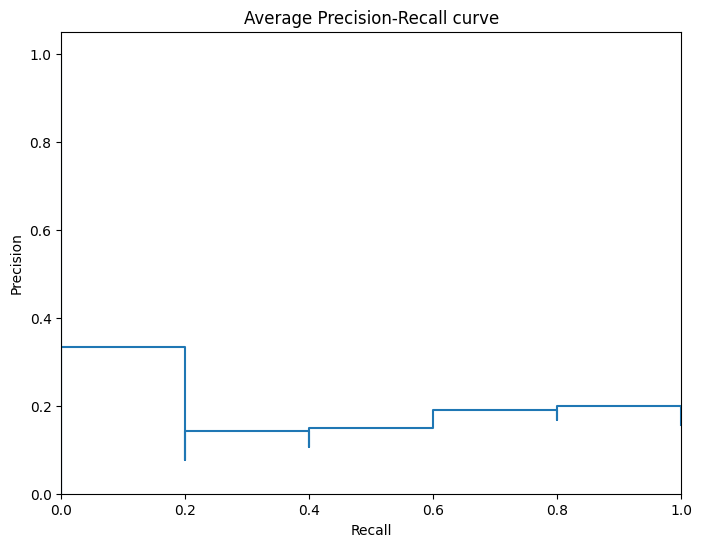

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision, recall, and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve((y_true == i).astype(int), y_score[:, i])
    average_precision[i] = average_precision_score((y_true == i).astype(int), y_score[:, i])

# Compute the AUPRC by averaging the average precision values obtained for each class
auprc = np.mean(list(average_precision.values()))

print("Average Area Under the Precision-Recall Curve (AUPRC):", auprc)
# Plot Precision-Recall curves for each class
plt.figure(figsize=(8, 6))
plt.step(recall[i], precision[i], where='post',label='Class {0} (AUPRC = {1:0.2f})'.format(i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average Precision-Recall curve')
plt.show()